# Part 4: Apply hypothesis testing to explore what makes a movie successful.

For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder. They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie

## Import & Combine data

In [82]:
import pandas as pd

In [83]:
# Load the CSV files

df_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", compression="gzip")
df_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", compression="gzip")
pd.set_option("display.max_columns", None)

In [95]:
df_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.011,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,"[{'id': 85, 'logo_path': None, 'name': 'Konrad...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-25,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.331,1213.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,0.681,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,With the future of the world hanging in the ba...,1.060,/z18E0lukzOtAALmfINSTCUU0Als.jpg,"[{'id': 71364, 'logo_path': None, 'name': 'Car...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-01,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",8.402,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.438,129.0,PG-13


In [85]:
# Recursive query - extra /**/ added to string
q = ['Data/final_tmdb_data_2000.csv.gz', 'Data/final_tmdb_data_2001.csv.gz']
tmdb_files = q 
# Showing the first 5 
tmdb_files[:5]


['Data/final_tmdb_data_2000.csv.gz', 'Data/final_tmdb_data_2001.csv.gz']

In [86]:
# Count the number of rows in df_2001
num_rows_df_2001 = df_2001.shape[0]

# Count the number of rows in df_2000
num_rows_df_2000 = df_2000.shape[0]


print("Number of rows in df_2001:", num_rows_df_2001)
print("Number of rows in df_2000:", num_rows_df_2000)

Number of rows in df_2001: 1342
Number of rows in df_2000: 1248


In [87]:
#merge
df = pd.concat([df_2000, df_2001], ignore_index=True)
#check total
df.shape[0]

2590

## Clean data

In [96]:
df = df.dropna(subset=['certification', 'revenue'])

# DATA CLARIFICATION. USE 2001 PART 2 (SHOULD IT BE PART 3?) ONLY FOR NOW

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates? (USE ANOVA)

- They want you to perform a statistical test to get a mathematically-supported answer.
- They want you to report if you found a significant difference between ratings.
    - If so, what was the p-value of your analysis?
    - And which rating earns the most revenue?
- They want you to prepare a visualization that supports your finding.

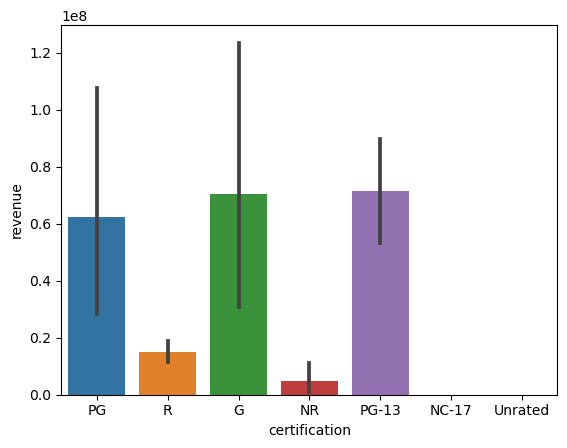

In [98]:
sns.barplot(data=df, x='certification',y='revenue');

### Separating Our Groups

In [99]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated'])

### Testing Assumptions

In [100]:
import pandas as pd
from scipy import stats

norm_results = {}

for i, data in groups.items():
    if len(data) >= 8:  # Check if the group has at least 8 data points
        stat, p = stats.normaltest(data)
        norm_results[i] = {'n': len(data),
                           'p': p,
                           'test stat': stat}
    else:
        print(f"Group {i} does not have enough data points for normal test.")

norm_results_df = pd.DataFrame(norm_results).T
print(norm_results_df)


Group NC-17 does not have enough data points for normal test.
Group Unrated does not have enough data points for normal test.
           n             p   test stat
PG      62.0  1.207790e-19   87.120650
R      465.0  2.271121e-96  440.455791
G       25.0  4.860998e-09   38.284044
NR      73.0  6.959114e-32  143.485342
PG-13  182.0  1.320001e-30  137.599841


In [101]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,62.0,1.207790e-19,87.120650,True
R,465.0,2.271121e-96,440.455791,True
G,25.0,4.860998e-09,38.284044,True
NR,73.0,6.959114e-32,143.485342,True
PG-13,182.0,1.320001e-30,137.599841,True


### Testing Assumption of Equal Variance

In [102]:
stats.levene(groups['PG-13'],
            groups['PG'],
            groups['R'],
            groups['NR'],
            groups['G'])

LeveneResult(statistic=21.171461307584046, pvalue=1.2960483793689429e-16)

### Did you find a significant difference between ratings?

- P-value is very small (1.2960483793689429e-16), which is less than the commonly used significance level of 0.05.
- This indicates strong evidence against the null hypothesis
- There IS a significant difference in the groups

### If so, what was the p-value of your analysis?
- 1.2960483793689429e-16
### And which rating earns the most revenue?
-  rating with the highest "test stat" value. "R" has the highest test statistic of 440.455791, suggesting that the "R" rating category might be associated with the highest revenue.

### One-Way ANOVA Test

In [103]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=14.233427144846344, pvalue=1.85584542480982e-15)

### Tukey's Pairwise Multiple Comparisons Test

In [104]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the Certification
values = df['revenue']
labels = df['certification']

In [111]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-70418856.48,0.4887,-180650842.3269,39813129.3669,False
G,NR,-65580213.754,0.0105,-121769564.949,-9390862.559,True
G,PG,-7938730.6252,0.9996,-65385576.8319,49508115.5816,False
G,PG-13,1046580.009,1.0,-50672630.6908,52765790.7089,False
G,R,-55504776.5058,0.0177,-105286963.6625,-5722589.3491,True
G,Unrated,-70418856.48,0.9805,-317698908.6205,176861195.6605,False
NC-17,NR,4838642.726,1.0,-98140412.8004,107817698.2524,False
NC-17,PG,62480125.8548,0.5611,-41190423.6204,166150675.3301,False
NC-17,PG-13,71465436.489,0.3538,-29144301.8309,172075174.809,False
NC-17,R,14914079.9742,0.9994,-84713771.7917,114541931.7401,False


# 2. Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)? (USE t-test)

In [20]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.065,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.761,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.665,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,27.301,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2278.0,PG


In [21]:
# Create a new column 'duration_category' based on runtime
df['duration_category'] = pd.cut(df_2001['runtime'], bins=[0, 90, float('inf')], labels=['Short', 'Long'])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,duration_category
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.065,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN,Long
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.761,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN,Short
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.665,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN,Long
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,27.301,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2278.0,PG,Long


In [23]:
# see how many long and short
df['duration_category'].value_counts()

Long     851
Short    424
Name: duration_category, dtype: int64

In [24]:
# Filtering out those long and short
long_df = df.loc[df['duration_category']== 'Long'].copy()
short_df = df.loc[df['duration_category']== 'Short'].copy()

In [25]:
long_revenue = long_df['revenue']
short_revenue = short_df['revenue']

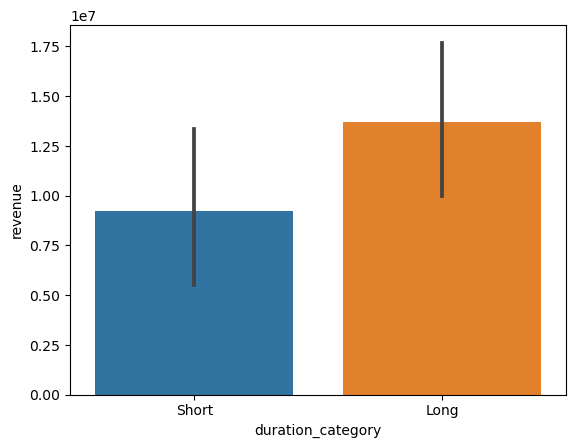

In [30]:
sns.barplot(data=df, x='duration_category',y='revenue');

## Check for and remove outliers

In [35]:
# Check for outliers in revenue for long_revenue group
zscores= stats.zscore(long_revenue)
outliers = abs(zscores)>3
np.sum(outliers)

28

In [36]:
# remove outliers from long_revenue group
long_revenue = long_revenue[(np.abs(stats.zscore(long_revenue)) < 3)]

In [37]:
# check for outliers in revenue for short_revenue group
zscores= stats.zscore(short_revenue)
outliers = abs(zscores)>3
np.sum(outliers)


9

In [38]:
# remove outlier for short_revenue group
short_revenue = short_revenue[(np.abs(stats.zscore(short_revenue)) < 3)]

## Check for Normality

In [39]:
result_long_revenue = stats.normaltest(long_revenue)
result_long_revenue

NormaltestResult(statistic=783.8473193846814, pvalue=6.161937206253078e-171)

In [40]:
# test the short_revenue group for normality
result_short_revenue = stats.normaltest(short_revenue)
result_short_revenue

NormaltestResult(statistic=462.1082061546072, pvalue=4.51313175557417e-101)

#### Our p-values for both groups are well ABOVE 0.05, which means our data is normally distributed. 

## Check for Equal Variance

In [41]:
# Test for equal variance
result = stats.levene(long_revenue, short_revenue)
result

LeveneResult(statistic=3.460222464997456, pvalue=0.06310275330210305)

In [42]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(long_revenue, short_revenue, equal_var = False)
result

Ttest_indResult(statistic=-1.5967369855807985, pvalue=0.11087800638969852)

#### Our p-value > alpha (0.05), so we FAIL reject the null hypothesis. There is NO significant difference between the revenue of movies that are long (over 2.5 hours long) and those that are short (1.5 hours long or less)

# Do movies released in 2000 earn less revenue than movies released in 2001?

In [68]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Filter out rows with missing or invalid 'release_date'
df = df.dropna(subset=['release_date'])

# Extract year from 'release_date' and create the 'year' column
df['year'] = df['release_date'].dt.year
df['year'] = df['year'].astype(float).round(0).astype(int)
df.head()

/var/folders/_d/vjsz0dr536z6nlzvz6jh276h0000gp/T/ipykernel_13372/1942376401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year
/var/folders/_d/vjsz0dr536z6nlzvz6jh276h0000gp/T/ipykernel_13372/1942376401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(float).round(0).astype(int)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,duration_category,year
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.065,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN,Long,2000
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.761,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN,Short,2000
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.665,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN,Long,2000
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,27.301,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,2278.0,PG,Long,2000
5,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.408,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R,Long,2000


In [69]:
# Create a new column 'duration_category' based on runtime
#df['duration_category'] = pd.cut(df_2001['runtime'], bins=[0, 90, float('inf')], labels=['Short', 'Long'])

# Calculate average revenue for movies released in 2000
revenue_2000 = df[df['year'] == 2000]['revenue'].mean()

# Calculate average revenue for movies released in 2001
revenue_2001 = df[df['year'] == 2001]['revenue'].mean()

In [70]:
# see how many long and short
df['year'].value_counts()

2001    1291
2000    1140
2002      82
1999      17
2003      12
1998       5
2005       5
2004       5
1997       3
1996       3
2021       2
1989       1
2007       1
2006       1
Name: year, dtype: int64

In [71]:
# Filtering out those long and short
df_2000 = df.loc[df['year']== 2000].copy()
df_2001 = df.loc[df['year']== 2001].copy()

In [72]:
revenue_2000 = df_2000['revenue']
revenue_2001 = df_2001['revenue']

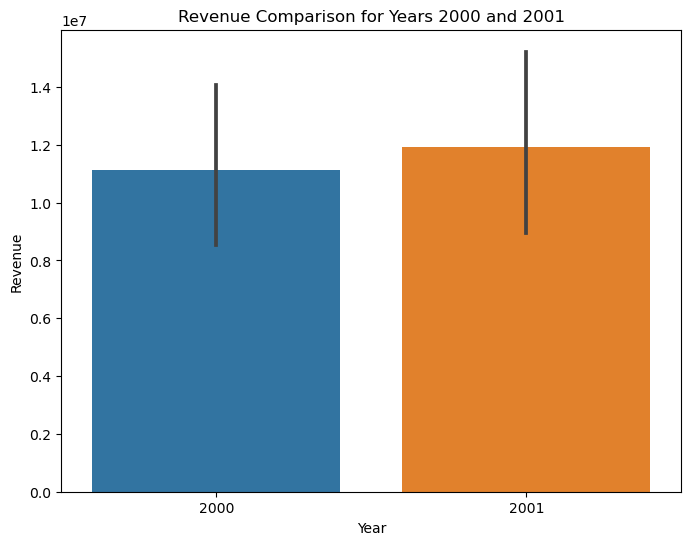

In [73]:
#sns.barplot(data=df, x='year',y='revenue');

# Filter rows with year equal to 2000 or 2001
filtered_df = df[df['year'].isin([2000, 2001])]

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='year', y='revenue')
plt.title('Revenue Comparison for Years 2000 and 2001')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

## Check for and remove outliers

In [74]:
# Check for outliers in revenue for long_revenue group
zscores= stats.zscore(revenue_2000)
outliers = abs(zscores)>3
np.sum(outliers)

27

In [75]:
# remove outliers from long_revenue group
revenue_2000 = revenue_2000[(np.abs(stats.zscore(revenue_2000)) < 3)]

In [76]:
# check for outliers in revenue for short_revenue group
zscores= stats.zscore(revenue_2001)
outliers = abs(zscores)>3
np.sum(outliers)


20

In [77]:
# remove outlier for short_revenue group
revenue_2001 = revenue_2001[(np.abs(stats.zscore(revenue_2001)) < 3)]

## Check for Normality

In [78]:
result_revenue_2000 = stats.normaltest(revenue_2000)
result_revenue_2000

NormaltestResult(statistic=1092.7498907117401, pvalue=5.156751240797906e-238)

In [79]:
# test the short_revenue group for normality
result_revenue_2001 = stats.normaltest(revenue_2001)
result_revenue_2001

NormaltestResult(statistic=1283.2715638245218, pvalue=2.1934135590570982e-279)

#### Our p-values for both groups are well ABOVE 0.05, which means our data is normally distributed. 

## Check for Equal Variance

In [80]:
# Test for equal variance
result = stats.levene(revenue_2000, revenue_2001)
result

LeveneResult(statistic=1.436755387506609, pvalue=0.23078434711164933)

In [81]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(revenue_2000, revenue_2001, equal_var = False)
result

Ttest_indResult(statistic=-1.2133558907531738, pvalue=0.22511442220533376)

#### Our p-value > alpha (0.05), so we FAIL reject the null hypothesis. There is NO significant difference between the revenue of movies that are long (over 2.5 hours long) and those that are short (1.5 hours long or less)